In [167]:
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
#plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=3, suppress=True)

# Task 1

In [12]:
data = sio.loadmat("annthyroid.mat")

In [13]:
X_data = pd.DataFrame(data["X"])
y_data = pd.DataFrame(data["y"])

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sc = scaler.fit_transform(X_data)

In [15]:
y_sc = np.array(y_data)

In [16]:
y_sc = y_sc.reshape(7200,)

In [19]:
y_sc.shape

(7200,)

In [161]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib
#print(cancer.data.shape)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sc)


Using matplotlib backend: TkAgg


In [8]:
print(X_pca.shape)
print(y_data.shape)


(7200, 2)
(7200, 1)


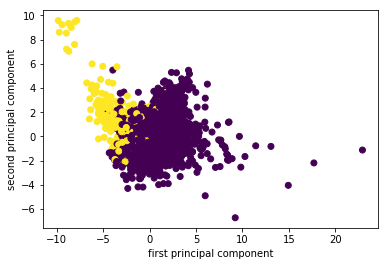

In [9]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_sc)
plt.xlabel("first principal component")
plt.ylabel("second principal component")
components = pca.components_
#plt.imshow(components.T)
#plt.yticks(range(len(y_data.columns)), y_data.columns)
#plt.colorbar()

In [207]:
from sklearn.manifold import TSNE
#from sklearn.datasets import load_digits
#digits = load_digits()
#X = digits.data / 16.
X_tsne = TSNE().fit_transform(X_sc)
#X_pca = PCA(n_components=2).fit_transform(X_sc)



In [208]:
X_tsne

array([[ 60.845, -18.318],
       [-39.394, -51.906],
       [  4.52 , -37.725],
       ...,
       [  0.374,  30.941],
       [-59.743,  24.545],
       [ 16.716,  49.189]], dtype=float32)

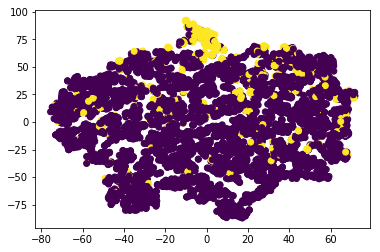

In [209]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = y_sc)
#plt.xlabel("first principal component")
#plt.ylabel("second principal component")

In [27]:
X_sc

array([[ 1.107, -0.185, -0.66 ,  0.294, -0.83 ,  0.908],
       [-1.482, -0.201,  1.33 ,  0.933,  1.843, -0.144],
       [-0.267, -0.129,  0.534, -0.207,  1.738, -0.976],
       ...,
       [-0.056, -0.178,  0.016, -0.54 , -1.616,  0.576],
       [-0.901, -0.09 ,  0.016, -0.54 , -0.463, -0.338],
       [ 1.107, -0.187,  0.016, -0.79 , -0.411, -0.643]])

# Task 3 Outlier Detection

### 3.1

In [37]:
#Since we can assume that we know the proportion of outliers in the data
print("Actual proportion of outliers in the data: ", np.mean(y_sc))

Actual proportion of outliers in the data:  0.07416666666666667


In [158]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=0.07416666666666667).fit(X_sc)
pred_ee = ee.predict(X_sc)
print(pred_ee)
print("Predicted proportion of outliers in the data using Elliptic Envelope: ", np.mean(pred_ee == -1))

[1 1 1 ... 1 1 1]
Predicted proportion of outliers in the data using Elliptic Envelope:  0.07416666666666667


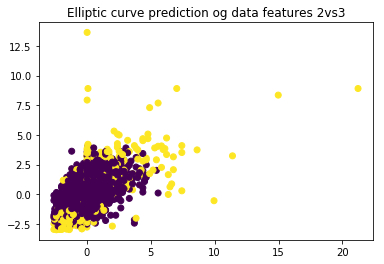

In [211]:
plt.title("Elliptic curve prediction og data features 2vs3")
plt.scatter(X_sc[:, 2], X_sc[:, 3], c=pred_ee)

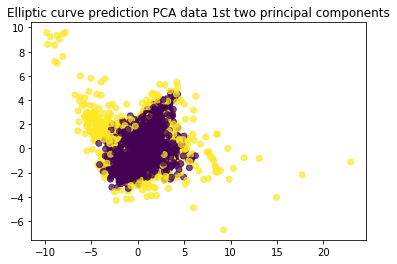

In [212]:
plt.title("Elliptic curve prediction PCA data 1st two principal components")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred_ee, alpha = 0.7)

In [68]:
from sklearn.svm import OneClassSVM
oneclass = OneClassSVM(nu=0.07416666666666667).fit(X_sc)
pred_oc = oneclass.predict(X_sc)


In [50]:
np.mean(pred_oc == -1)

0.07458333333333333

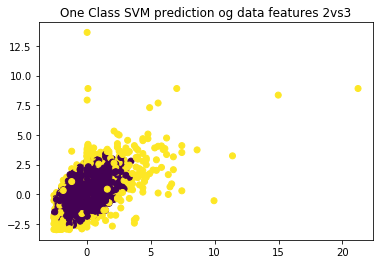

In [213]:
plt.title("One Class SVM prediction og data features 2vs3")
plt.scatter(X_sc[:, 2], X_sc[:, 3], c=pred_oc)

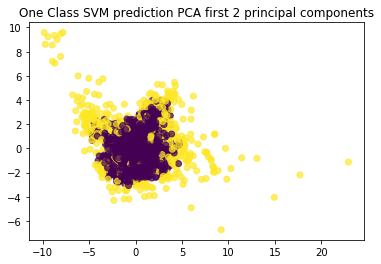

In [217]:
plt.title("One Class SVM prediction PCA first 2 principal components")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred_oc, alpha =0.7)

In [52]:
from sklearn.ensemble import IsolationForest

In [110]:
ifr = IsolationForest(contamination=0.07416666666666667)

In [111]:
ifr.fit(X_sc)

IsolationForest(bootstrap=False, contamination=0.07416666666666667,
        max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=1,
        random_state=None, verbose=0)

In [112]:
pred_if = ifr.predict(X_sc)

In [113]:
np.mean(pred_if == -1)

0.07416666666666667

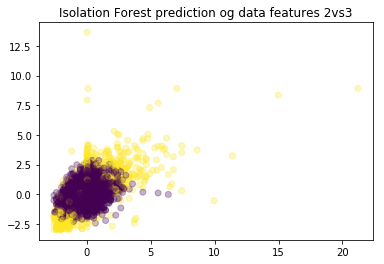

In [216]:
plt.title("Isolation Forest prediction og data features 2vs3")
plt.scatter(X_sc[:, 2], X_sc[:, 3], c=pred_if, alpha = 0.3)

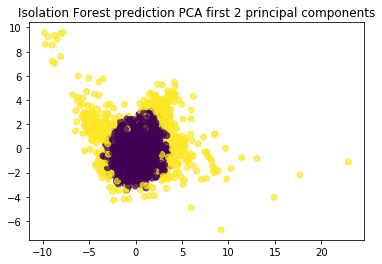

In [218]:
plt.title("Isolation Forest prediction PCA first 2 principal components")

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred_if, alpha = 0.7)

### Without using the ground truth we cannot really gauge how good an outlier detection algorithm works as the visualizing the predictions of all three models on X_pca leads to similar looking plots. Not much can be inferred from them 

In [219]:
ee.decision_function(X_sc)

array([2.553, 2.419, 1.104, ..., 2.056, 3.501, 3.143])

In [220]:
oneclass.decision_function(X_sc)

array([[ 9.077],
       [ 5.277],
       [ 7.151],
       ...,
       [ 9.115],
       [11.846],
       [ 8.598]])

In [221]:
ifr.decision_function(X_sc)

array([0.113, 0.053, 0.093, ..., 0.103, 0.137, 0.132])

#### As we can see only the Isolation Forest decision function provides output values between 0 and 1

### 3.2

In [65]:
from sklearn.metrics import average_precision_score

In [ ]:
for i in range(len(y_sc)):
    #print(y_sc[i])

for i in range(len(y_sc)):
    if(pred_ee[i] == 1):
        pred_ee[i] = 0
        
    else:
        pred_ee[i] = 1
    print(pred_ee[i])

for i in range(len(y_sc)):
    if(pred_oc[i] == 1):
        pred_oc[i] = 0
        
    else:
        pred_oc[i] = 1
    print(pred_oc[i])

for i in range(len(y_sc)):
    if(pred_if[i] == 1):
        pred_if[i] = 0
        
    else:
        pred_if[i] = 1
    print(pred_if[i])

In [230]:
average_precision_ee = average_precision_score(y_sc, pred_ee)
average_precision_oc = average_precision_score(y_sc, pred_oc)
average_precision_if = average_precision_score(y_sc, pred_if)


print('Elliptic Envelope Average precision-recall score: {0:0.2f}'.format(
      average_precision_ee))

print('One Class SVM Average precision-recall score: {0:0.2f}'.format(
      average_precision_oc))

print('Isolation Forest Average precision-recall score: {0:0.2f}'.format(
      average_precision_if))

Elliptic Envelope Average precision-recall score: 0.25
One Class SVM Average precision-recall score: 0.11
Isolation Forest Average precision-recall score: 0.15


In [121]:
average_precision_ee = average_precision_score(y_sc, pred_ee)
average_precision_oc = average_precision_score(y_sc, pred_oc)
average_precision_if = average_precision_score(y_sc, pred_if)


print('Elliptic Envelope Average precision-recall score: {0:0.2f}'.format(
      average_precision_ee))

print('One Class SVM Average precision-recall score: {0:0.2f}'.format(
      average_precision_oc))

print('Isolation Forest Average precision-recall score: {0:0.2f}'.format(
      average_precision_if))

Elliptic Envelope Average precision-recall score: 0.25
One Class SVM Average precision-recall score: 0.11
Isolation Forest Average precision-recall score: 0.15


In [122]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import zero_one_loss
ee_auc = roc_auc_score(y_sc, pred_ee)
oc_auc = roc_auc_score(y_sc, pred_oc)
if_auc = roc_auc_score(y_sc, pred_if)

ee_loss = zero_one_loss(y_sc, pred_ee)
oc_loss = zero_one_loss(y_sc, pred_oc)
if_loss = zero_one_loss(y_sc, pred_if)

print("AUC for Elliptic Envelope is ", ee_auc)
print("AUC for One Class SVM: ", oc_auc)
print("AUC for Isolated Forest: ", if_auc)


print("Zero-one loss for Elliptic Envelope is ", ee_loss)
print("Zero-one loss for One Class SVM: ", oc_loss)
print("Zero-one loss for Isolated Forest: ", if_loss)

AUC for Elliptic Envelope is  0.7077235813468987
AUC for One Class SVM:  0.5841154340153115
AUC for Isolated Forest:  0.6288392884232243
Zero-one loss for Elliptic Envelope is  0.08027777777777778
Zero-one loss for One Class SVM:  0.11458333333333337
Zero-one loss for Isolated Forest:  0.1019444444444444


### The AUC and average precision readings suggest that EllipticEnvelope is the best

#### The clustering approaches from task 2 yield poor results with in some cases 3 clusters giving the best results. Thus, the approaches in Task 3 which assume the additional information that you know the number of classes and their proportion gives better results

#### However comaparing the visualzations in Task 3 with the ground truth clustering of the PCA visualization in Task 1 we notice that even Task 3 is quite off. Therefore there is no tangible way of comparing one model from another without knowing the ground truth and just via visualization. This could be the result of the data being highly non Gaussian

# Task 4

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y_sc, stratify = y_sc)

#### Imbalanced Learning

In [195]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
scores = cross_validate(LogisticRegression(),
                        X_sc, y_sc, cv=10, scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9726447870177892, 0.7637355829525652)

In [196]:
from sklearn.ensemble import RandomForestClassifier
scores = cross_validate(RandomForestClassifier(n_estimators=100),
                        X_sc, y_sc, cv=10, scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9957853471700322, 0.9321881275718397)

#### Balanced weights

In [197]:
scores = cross_validate(LogisticRegression(class_weight='balanced'),
                        X_sc, y_sc, cv=10, scoring=('roc_auc', 'average_precision'))
print("Test ROC AUC for Logistic :", scores['test_roc_auc'].mean(),"| Average Precision for Logistic: ", scores['test_average_precision'].mean())

Test ROC AUC for Logistic : 0.9884794372602356 | Average Precision for Logistic:  0.8286989153040795


In [198]:
scores = cross_validate(RandomForestClassifier(n_estimators=100, class_weight='balanced'),
                        X_sc, y_sc, cv=10, scoring=('roc_auc', 'average_precision'))
print("Test ROC AUC for Random Forest :", scores['test_roc_auc'].mean(),"| Average Precision for Random Forest: ", scores['test_average_precision'].mean())

Test ROC AUC for Random Forest : 0.9957258147797312 | Average Precision for Random Forest:  0.9299544849138884


#### Grid Searching C for LogReg and other pruning parameters for the trees

In [133]:
from sklearn.model_selection import GridSearchCV

In [134]:
param_grid_rf = {

    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    
    'n_estimators': [100, 200, 300, 1000]
}

In [135]:
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_rf, cv=3)

In [136]:
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [137]:
rf_grid.score(X_test,y_test)

0.9833333333333333

In [143]:
print("AUC for RF is ", roc_auc_score(y_test, rf_grid.predict(X_test)))
print("Avg Precision for RF : ", average_precision_score(y_test, rf_grid.predict(X_test)))

AUC for RF is  0.9737045072188569
Avg Precision for RF :  0.8079279080053073


In [199]:
param_grid_lr = {

    'C': [ 0.1, 1,2,5 ,10,100]
}

In [200]:
lr_grid = GridSearchCV(LogisticRegression(), param_grid=param_grid_lr, cv=10)

In [201]:
lr_grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 2, 5, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [202]:
lr_grid.score(X_test,y_test)

0.9533333333333334

In [206]:
print("AUC for LogReg is ", roc_auc_score(y_test, lr_grid.predict(X_test)))
print("Avg Precision for LogReg : ", average_precision_score(y_test, lr_grid.predict(X_test)))

AUC for LogReg is  0.7208793965347333
Avg Precision for LogReg :  0.4249064202795546


### Changing to balanced weights gives the best avg precision and recall scores. So yes. It helps